<a href="https://colab.research.google.com/github/lbarraganm/ml_ejemplos/blob/master/Prediccio%CC%81n_de_Poliza_de_Seguro_Me%CC%81dico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicción de Poliza de Seguro Médico**

## **Predicción de Poliza de Seguro Médico**

En este análisis, tenemos en nuestra cartera aproximadamente 400.000 asegurados con seguro automovil. Los titulares de pólizas de este conjunto de datos ya son nuestros clientes. Lo que toda compañía de seguros pretende hacer es ampliar su cartera vendiendo a sus clientes otro producto de su oferta.

**Como el producto se vende entre segmentos, lo llamamos como 'venta cruzada'.**

Además, solemos dividir nuestra cartera en:
* Negocio de renovaciones: asegurados que acaban de renovar la póliza
* Nuevos negocios: asegurados que tendrán una póliza nuestra la primera vez

En esta investigación de venta cruzada, no tenemos ninguna información sobre nuestra cartera de seguro médico existente. Por lo tanto, este es un análisis empresarial puramente nuevo.

Otro punto importante es que los nuevos modelos de negocios siempre están conectados por los llamados "modelos de la competencia". ¿Por qué? Nuestra empresa es siempre una de las muchas presentes en el mercado de seguros, por lo que no podemos tratarla como una isla solitaria. Lo que se suele hacer es ajustar la tarifa de nuestros competidores y comparar nuestra tarifa con la de ellos. Por tanto, en este caso no produciremos estructuras perfectamente utilizables independientemente del nivel de predicción. Sin embargo, esta gran información nos permite de todos modos realizar una tarea muy absorbente.

### Planteamiento del problema:

La compañía de seguros que brinda seguro de automovil a sus clientes ahora planea brindar un seguro médico. La empresa quiere saber cuántos de sus clientes estarían interesados en adquir un seguros médico.

### Solución
Como solución al problema, realizaremos los siguientes pasos
##### EDA:
Realizaremos un EDA para extraer información valiosa de los datos.

##### Feature Engineering: 
Realice la ingeniería de características para verificar qué columnas juegan un papel muy importante en la construcción del modelo e intente encontrar nuevas características que marquen la diferencia en la construcción del modelo. 

##### Modelación:
Crearemos un conjunto de modelos, para obtener una puntuación de probabilidad que indique las posibilidades de que una persona opte por un seguro médico.

# Tabla de contenido

<a href='#1'>1. Importar Librarias y Dataset </a> <br>
<a href='#2'>2. Dataset </a> <br>
<a href='#3'>3. Exploratory Data Analysis y Visualización de Datos </a> <br>
<a href='#4'>4. Procesamiento de Datos</a> <br>
<a href='#5'>5. Regresión Logistica </a> <br>
<a href='#6'>6. Gaussian Naive Bayes </a> <br>
<a href='#7'>7. KNN </a> <br>
<a href='#8'>8. Artificial Neural Networks </a> <br>
<a href='#9'>9. Random Forest </a> <br>
<a href='#10'>10. Gradient Boosting Machines </a> <br>
<a href='#11'>11. Xgboost </a> <br>
<a href='#12'>12. LightGBM </a> <br>
<a href='#13'>13. Comparando todos los Modelos </a> <br>

# <a id='1'> 1. Importando Libreria </a>

In [1]:
import numpy as np 
import pandas as pd

import seaborn as sns 
import matplotlib.pyplot as plt
# Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

# <a id='2'> 2. Data Set</a>

## **Descripción de los Datos** <br>
**id** <br> Identificador único del cliente <br>
**Gender**<br> Genero del cliente <br>
**Age**<br> Edad del cliente <br>
**Driving_License** <br>
 0 : El cliente no tiene DL <br>
 1 : El cliente tiene DL <br>
**Region_Code**<br> Codigo unico de la región del cliente <br>
**Previously_Insured** <br>
1 : El cliente tiene Vehicle Insurance <br>
0 : El cliente no Vehicle Insurance <br>
**Vehicle_Age** <br> Edad del vehiculo <br>
**Vehicle_Damage**: <br>
1 : El cliente sufrió daños en su vehiculo en el pasado.<br>
0 : El cliente no sufrió daños en su vehiculo en el pasado. <br>
**Annual_Premium**: La cantidad que el cliente debe pagar como prima en el año. <br>
**PolicySalesChannel**<br> Canal de venta de la poliza ie. Different Agents, Over Mail, Over Phone, In Person, etc.<br>
**Vintage**<br> Número de días que el cliente ha esta asociado a la empresa <br>
**Response** <br>
1 : El cliente esta interesado en adquir una poliza de seguro médico <br>
0 : El cliente no esta interesado en adquir una poliza de seguro médico<br>

** Link de Descarga: https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction <br>

In [2]:
#train = pd.read_csv('train.csv')
#test = pd.read_csv('test.csv')
#sample_sub = pd.read_csv('sample_submission.csv')

#train = pd.read_csv('/Users/lbarraganm/Downloads/Health_Insurance_Cross_sell_prediction/train.csv')
#test = pd.read_csv('/Users/lbarraganm/Downloads/Health_Insurance_Cross_sell_prediction/test.csv')
#sample_sub = pd.read_csv('/Users/lbarraganm/Downloads/Health_Insurance_Cross_sell_prediction/sample_submission.csv')

train = pd.read_csv('https://github.com/lbarraganm/ml_ejemplos/blob/master/Health_Insurance_Cross_sell_prediction/train.csv?raw=true',sep=',',decimal='.',index_col=0)
test = pd.read_csv('https://github.com/lbarraganm/ml_ejemplos/blob/master/Health_Insurance_Cross_sell_prediction/test.csv?raw=true',sep=',',decimal='.',index_col=0)
sample_sub= pd.read_csv('https://github.com/lbarraganm/ml_ejemplos/blob/master/Health_Insurance_Cross_sell_prediction/sample_submission.csv?raw=true',sep=',',decimal='.',index_col=0)

df=train.copy()



In [3]:
#train=train.drop(['id'], axis=1)
#test=test.drop(["id"], axis=1)
#df=df.drop(["id"], axis=1)

In [4]:
#Conjunto de prueba
test.head(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
id,,,,,,,,,,
381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [5]:
#Conjunto de entrenamiento
train.head(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
df.shape

(381109, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 34.9+ MB


In [8]:
#Nombre de las columnas
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [9]:
#Vericamos si tenemos valores nulos o pérdidos
df.isnull().values.any()

False

In [10]:
df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [11]:
df.corr()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Age,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155
Region_Code,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170
Annual_Premium,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050
Response,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000


# ** Coeficientes de correlación lineal ** 


Los coeficientes de correlación lineal son estadísticos que cuantifican la asociación lineal entre dos variables numéricas. Existen diferentes tipos, de entre los que destacan el Pearson, Rho de Spearman y Tau de Kendall. Todos ellos comparten que:

Su valor está comprendido en el rango [+1 , -1]. Siendo +1 una correlación positiva perfecta y -1 una correlación negativa perfecta.

Se emplean como medida de la fuerza de asociación entre dos variables (tamaño del efecto):

## 0: asociación nula. 

## 0.1: asociación pequeña.

## 0.3: asociación mediana. 

## 0.5: asociación moderada.

## 0.7: asociación alta. 

## 0.9: asociación muy alta. 

Desde el punto de vista práctico, las principales diferencias entre estos tres coeficientes son:

La correlación de Pearson funciona bien con variables cuantitativas que tienen una distribución normal o próxima a la normal. Es más sensible a los valores extremos que las otras dos alternativas.

La correlación de Spearman se emplea con variables cuantitativas (continuas o discretas). En lugar de utilizar directamente el valor de cada variable, los datos son ordenados y reemplazados por su respectivo orden ranking. Es un método no paramétrico muy utilizado cuando no se satisface la condición de normalidad necesaria para aplicar la correlación de Pearson.

La correlación de Kendall es otra alternativa no paramétrica que, al igual que la correlación de Spearman, utiliza la ordenación de las observaciones ranking. Es recomendable cuando se dispone de pocos datos y muchos de ellos ocupan la misma posición en el rango, es decir, cuando hay muchas ligaduras.


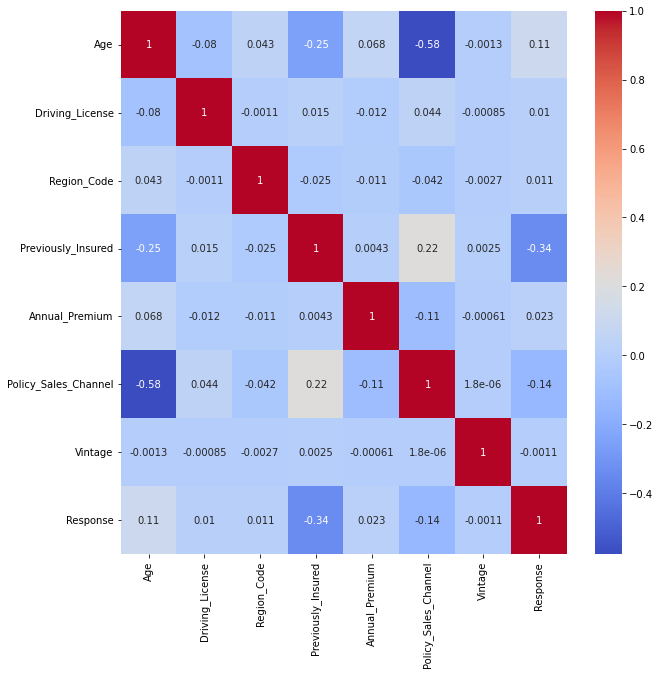

In [12]:

f, ax = plt.subplots(1, 1, figsize=(10, 10))
cmap = sns.diverging_palette(10, 240, n=9)
ax = sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


d1: mean=38.823 stdv=15.512
d2: mean=112.034 stdv=54.204


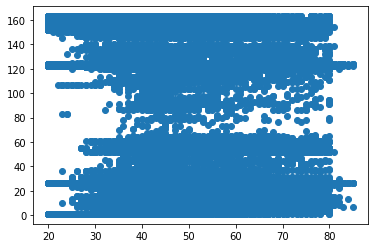

In [13]:
# importing libraries
from numpy import mean
from numpy import std
from matplotlib import pyplot


# creating data for columns
d1 = df['Age']
d2 = df['Policy_Sales_Channel']

# let's convert to a dataframe
dfcorr = pd.DataFrame({'Column1': d1, 'Column2': d2})

# summarize
print('d1: mean=%.3f stdv=%.3f' % (mean(d1), std(d1)))
print('d2: mean=%.3f stdv=%.3f' % (mean(d2), std(d2)))

# plot
pyplot.scatter(d1, d2)
pyplot.show()

In [14]:
dfcorr.corr(method ='pearson')

,Column1,Column2
Column1,1.000000,-0.577826
Column2,-0.577826,1.000000


In [15]:
dfcorr.corr(method ='spearman')

,Column1,Column2
Column1,1.000000,-0.648227
Column2,-0.648227,1.000000


In [16]:
dfcorr.corr(method ='kendall') 

,Column1,Column2
Column1,1.000000,-0.495516
Column2,-0.495516,1.000000


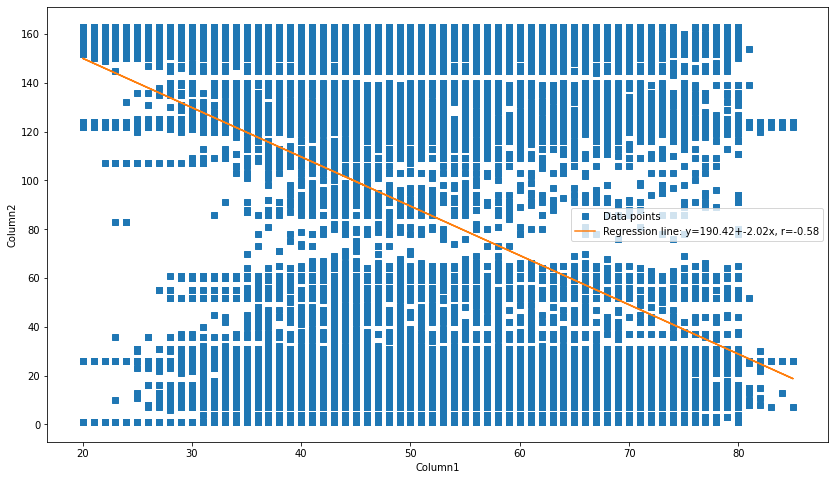

In [17]:
import scipy

# creating X-Y Plots With a Regression Line

# slope, intersept, and correlation coefficient calculation 
slope, intercept, r, p, stderr = scipy.stats.linregress(dfcorr['Column1'], dfcorr['Column2'])

line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

# plotting
fig, ax = pyplot.subplots(figsize = (14,8))
ax.plot(dfcorr['Column1'], dfcorr['Column2'], linewidth=0, marker='s', label='Data points')
ax.plot(dfcorr['Column1'], intercept + slope * dfcorr['Column1'], label=line)
ax.set_xlabel('Column1')
ax.set_ylabel('Column2')
ax.legend(facecolor='white')
pyplot.show()

In [18]:
slope, intercept, r, p, stderr

(-2.019161759778242,
 190.4233708015248,
 -0.5778255261514695,
 0.0,
 0.004619834318394567)

La más relevante es la relación entre "Respuesta" y el resto de variables. En este caso veo alguna correlación entre Respuesta y "Vehicle_Damage", además hay una relación negativa con la variable binaria "Previously_Insured". Otras relaciones interesantes:
* la edad está fuertemente correlacionada con la edad del automóvil. Es bien sabido en la relación actuarial mundial que los jóvenes conducen automóviles viejos
* edad con canal de ventas, las personas mayores tienden a usar corredores y agentes, los jóvenes usan Internet
* previamente asegurado se correlaciona con la edad y la edad del vehículo. Los jóvenes tienden a cambiar de aseguradora a menudo
* previamente asegurado con daños en el vehículo, de hecho, muchos titulares de polos cambian de asegurador mientras corren un gran riesgo
* **Antigüedad del vehículo y canal de venta de pólizas: este es un efecto espurio interesante. El efecto subyacente real es la relación entre la edad y el canal de ventas, lo que influye indirectamente en las cifras de la antigüedad del vehículo**

# <a id='3'> 3. Exploratory Data Analysis y Visualizacióon de Datos </a> 


In [19]:
df_gender=df['Gender'].value_counts().to_frame().reset_index().rename(columns={'index':'Gender','Gender':'count'})
print(df_gender)

   Gender   count
0    Male  206089
1  Female  175020


In [20]:

fig = go.Figure([go.Pie(labels=df_gender['Gender'], values=df_gender['count'],hole=0.2)])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12,insidetextorientation='radial')

fig.update_layout(title="Recuendo de Genero",title_x=0.5)
fig.show()

In [21]:
# Violin Boxplot

df_agevi=df['Age']
fig = go.Figure(data=go.Violin(y=df_agevi, box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               x0='Age'))

fig.update_layout(yaxis_zeroline=False,title="Distribución de la Edad",title_x=0.5)
fig.show()

In [22]:
fig = go.Figure(go.Box(y=df['Age'],name="Age ")) # to get Horizonal plot change axis   
fig.update_layout(title="Distribution of Age ",title_x=0.5)
fig.show()

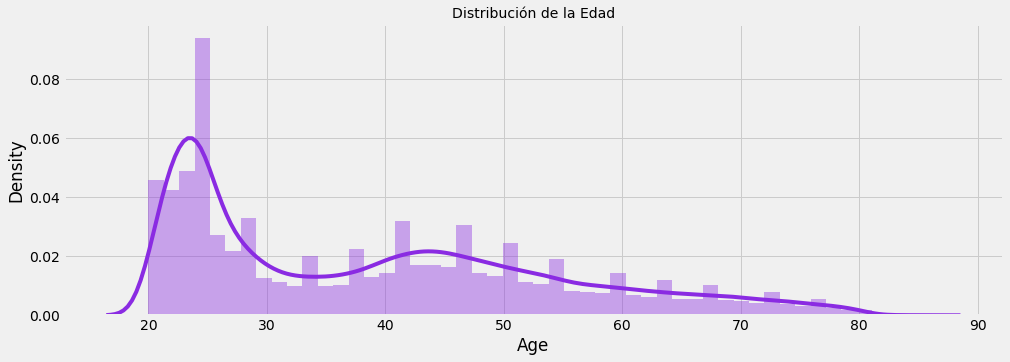

In [23]:

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(df['Age'], color = 'BlueViolet')
plt.title('Distribución de la Edad', fontsize = 14)
plt.show()

In [24]:
#plt.clf()
#plt.cla()
#plt.close()

In [25]:
print(max(df['Annual_Premium'].astype(int)))
print(min(df['Annual_Premium'].astype(int)))

540165
2630


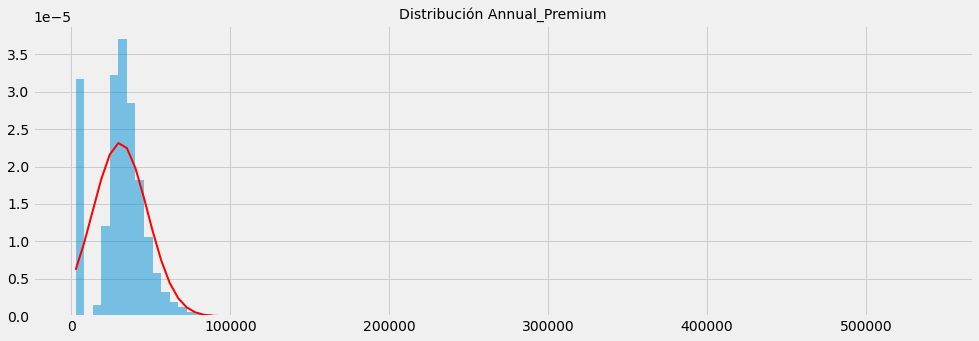

In [26]:


max_nn_i = max(df['Annual_Premium'].astype(int))
min_nn_i = min(df['Annual_Premium'].astype(int))

#mu, sigma = 0, 0.1 # media y desvio estandar


s = df['Annual_Premium']
mu, sigma, var = s.mean(), np.std(s) , np.var(s)
    

plt.rcParams['figure.figsize'] = (15, 5)

plt.title('Distribución Annual_Premium', fontsize = 14)

cuenta, cajas, ignorar = plt.hist(s,bins=100,density=True, histtype='bar', alpha=.5)


normal = plt.plot(cajas, 1/(np.sqrt(2 * np.pi * var)) *
         np.exp( - (cajas - mu)**2 / (2 * var) ),
         linewidth=2, color='r')


plt.show()

In [27]:
s.describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

In [28]:
display(s.dtypes)

dtype('float64')

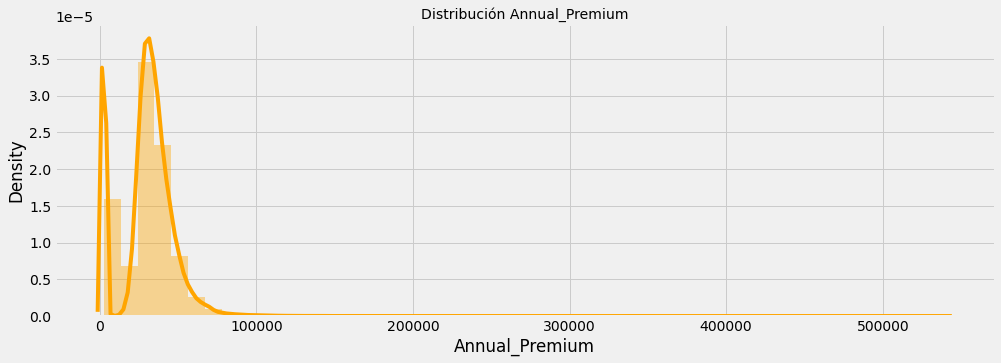

In [29]:

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(s, color = 'Orange')
plt.title('Distribución Annual_Premium', fontsize = 14)
plt.show()

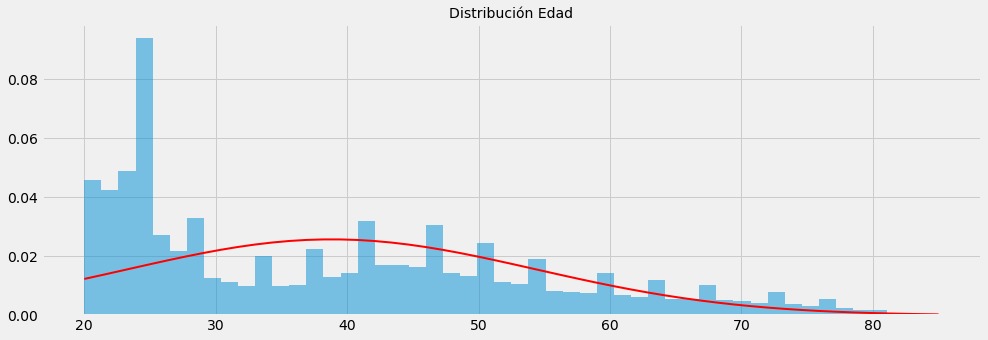

In [30]:


max_nn_i = max(df['Age'].astype(int))
min_nn_i = min(df['Age'].astype(int))

#mu, sigma = 0, 0.1 # media y desvio estandar


s = df['Age']
mu, sigma, var = s.mean(), np.std(s) , np.var(s)
    

plt.rcParams['figure.figsize'] = (15, 5)

plt.title('Distribución Edad', fontsize = 14)

cuenta, cajas, ignorar = plt.hist(s,bins=50,density=True, histtype='bar', alpha=.5)


normal = plt.plot(cajas, 1/(np.sqrt(2 * np.pi * var)) *
         np.exp( - (cajas - mu)**2 / (2 * var) ),
         linewidth=2, color='r')


plt.show()

In [31]:
s.describe()

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

In [32]:
df['age_category']=np.where((df['Age']<20),"Menor 20",
                   np.where((df['Age']>19)&(df['Age']<=30),"20-30",
                   np.where((df['Age']>30)&(df['Age']<=48),"31-48",
                   np.where((df['Age']>48)&(df['Age']<=70),"49-70",
                   np.where((df['Age']>70)&(df['Age']<=80),"71-80",
                   np.where(df['Age']>80,"Mayor 80","NULL"))))))

age=df['age_category'].value_counts().to_frame().reset_index().rename(columns={'index':'age_category','age_category':'Count'})


fig = go.Figure(data=[go.Scatter(
    x=age['age_category'], y=age['Count'],
    mode='markers',
    marker=dict(
        color=age['Count'],
        size=age['Count']*0.0005,
        showscale=True
    ))])

fig.update_layout(title=' Edad ',xaxis_title="Categoria de la Edad",yaxis_title="Número de Personas",title_x=0.5)
fig.show()

In [33]:
df.head(10)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,age_category
id,,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,31-48
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,71-80
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,31-48
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,20-30
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,20-30
6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0,20-30
7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0,20-30
8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1,49-70
9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0,20-30


In [34]:
df_VD=df.groupby(by =['Gender','age_category','Vehicle_Damage'])['Age'].count().to_frame().reset_index().rename(columns={'Gender':'Gender','Vehicle_Damage':'Vehicle_Damage','age_category':'Age Category','Age':'Count'})
df_VD['Vehicle_Damage']=df_VD['Vehicle_Damage'].astype('category')
df_VD

,Gender,Age Category,Vehicle_Damage,Count
0,Female,20-30,No,63565
1,Female,20-30,Yes,25614
2,Female,31-48,No,18037
3,Female,31-48,Yes,30851
4,Female,49-70,No,11129
5,Female,49-70,Yes,19249
6,Female,71-80,No,2583
7,Female,71-80,Yes,3913
8,Female,Mayor 80,No,41
9,Female,Mayor 80,Yes,38


In [35]:

fig = px.bar(df_VD, x="Vehicle_Damage", y="Count",color="Age Category",barmode="group",
             facet_row="Gender"
             )
fig.update_layout(title_text='Age Category With Vehicle Damage And Gender',title_x=0.5)
fig.show()

El gráfico anterior muestra la relación entre genero, daños del vehículo y la edad del vehículo

In [36]:
df_Vehicle_Damage=df['Vehicle_Damage'].value_counts().to_frame().reset_index().rename(columns={'index':'Vehicle_Damage','Vehicle_Damage':'count'})
print(df_Vehicle_Damage)

  Vehicle_Damage   count
0            Yes  192413
1             No  188696


In [37]:
fig = go.Figure([go.Pie(labels=df_Vehicle_Damage['Vehicle_Damage'], values=df_Vehicle_Damage['count'])])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12,insidetextorientation='radial')

fig.update_layout(title=" Vehicle Damage",title_x=0.5)
fig.show()

In [38]:
df_Vintage=df.groupby(by =['Gender','age_category'])['Vintage'].mean().to_frame().reset_index().rename(columns={'Gender':'Gender','age_category':'Age Category','Vintage':'Days'})
df_Vintage

,Gender,Age Category,Days
0,Female,20-30,154.987329
1,Female,31-48,153.926383
2,Female,49-70,154.584996
3,Female,71-80,153.569889
4,Female,Mayor 80,171.341772
5,Male,20-30,154.006060
6,Male,31-48,154.070755
7,Male,49-70,154.529662
8,Male,71-80,153.639243
9,Male,Mayor 80,152.980000


In [39]:

fig = px.bar(df_Vintage, x="Age Category", y="Days",
             color="Gender",barmode="group")
               
fig.update_layout(title_text='Average Vintage Days With Gender,Age Class',title_x=0.5)
fig.show()

En el gráfico anterior muestra el número días que el cliente ha tenido alguna relación con la empresa relacionado con la edad y también el genero.

In [40]:
df_PSC=df.Policy_Sales_Channel.value_counts().to_frame().reset_index()[0:10]

df_PSC['index']='PSC_Cod '+df_PSC['index'].astype('str')


fig = go.Figure(go.Bar(
    x=df_PSC['index'],y=df_PSC['Policy_Sales_Channel'],
    marker={'color': df_PSC['Policy_Sales_Channel'], 
    'colorscale': 'sunsetdark'},  
    text=df_PSC['Policy_Sales_Channel'],
    textposition = "outside",
))
fig.update_layout(title_text=' Código de canal de ventas las polizas de seguro',xaxis_title="Value",
                  yaxis_title="Número de persona",title_x=0.5)
fig.show()

El gráfico anterior muestra los 10 principales canales de ventas de las poliza de seguros.

In [41]:
df_PSC=df.Policy_Sales_Channel.value_counts().to_frame().reset_index()[0:10]
indexs=df_PSC['index']
df_PSC_age=df.groupby('Policy_Sales_Channel')['Age'].mean().to_frame().reset_index()

avg_age = []
age_cod=[]
for number in indexs:
    
    df_PSC_age_top1=df_PSC_age[df_PSC_age['Policy_Sales_Channel']==number]['Age']
    avg_age.extend(df_PSC_age_top1)
        
         
df_PSC_age = pd.DataFrame(avg_age)
df_PSC_Cod= pd.DataFrame(indexs)


frames = [df_PSC_age, df_PSC_Cod]

result = pd.concat(frames,axis=1)

result.columns = ['Age', 'Cod']

result['Cod']='PSC_Cod '+result['Cod'].astype('str')

fig = go.Figure(go.Bar(
    x=result['Cod'],y=result['Age'],
    marker={'color': result['Age'], 
    'colorscale': 'sunsetdark'},  
    text=result['Age'],
    textposition = "outside",
))
fig.update_layout(title_text=' Top 10 Policy Sales Channel Code Average Age',xaxis_title="Policy Sales Channel",yaxis_title="Age",title_x=0.5)
fig.show()

El gráfico anterior muestra los 10 principales canales de ventas de las poliza de seguros relacionado con la edad de los asegurados.

In [42]:
df_DL=df.groupby(by =['Gender','Driving_License'])['Age'].count().to_frame().reset_index().rename(columns={'Gender':'Gender','age_category':'Age Category','Age':'count'})
df_DL['Driving_License']=df_DL['Driving_License'].astype('category')
df_DL

,Gender,Driving_License,count
0,Female,0,212
1,Female,1,174808
2,Male,0,600
3,Male,1,205489


In [43]:
fig = px.bar(df_DL, x="Driving_License", y="count",
             color="Gender",barmode="group")
               
fig.update_layout(title_text='Gender With Driving License',title_x=0.5)
fig.show()

El gráfico anterior muestra quienes tiene licencia de conducir según genero.
0: nos indcia que no tiene licencia de conducir
1: Tiene licencia de conducir

El gráfico Muestra que los hombres poseen más licencia de conducir que las mujeres.

In [44]:
df_Driving_License=df['Driving_License'].value_counts().to_frame().reset_index().rename(columns={'index':'Driving_License','Driving_License':'count'})
print(df_Driving_License)

   Driving_License   count
0                1  380297
1                0     812


In [45]:


fig = go.Figure([go.Pie(labels=df_Driving_License['Driving_License'], values=df_Driving_License['count'],hole=0.2)])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12,insidetextorientation='radial')

fig.update_layout(title=" Customer Driving License",title_x=0.5)
fig.show()

               Driving_License 
         0 : Customer does not have DL 
         1 : Customer already has DL 

In [46]:
df_RGC=df.Region_Code.value_counts().to_frame().reset_index()[0:10]

df_RGC['index']='R_Cod '+df_RGC['index'].astype('str')


fig = go.Figure(go.Bar(
    x=df_RGC['index'],y=df_RGC['Region_Code'],
    marker={'color': df_RGC['Region_Code'], 
    'colorscale': 'portland'},  
    text=df_RGC['Region_Code'],
    textposition = "outside",
))
fig.update_layout(title_text='Top 10 Region Code',xaxis_title="Region Code",yaxis_title="Number Of People",title_x=0.5)
fig.show()

In [47]:


df_V_Age=df['Vehicle_Age'].value_counts().to_frame().reset_index().rename(columns={'index':'Vehicle_Age','Vehicle_Age':'Count'})


fig = go.Figure(data=[go.Scatter(
    x=df_V_Age['Vehicle_Age'], y=df_V_Age['Count'],
    mode='markers',
    marker=dict(
        color=df_V_Age['Count'],
        size=df_V_Age['Count']*0.0005,
        showscale=True
    ))])

fig.update_layout(title='Vehicle Age ',xaxis_title=" Vehicle Age ",yaxis_title="Number Of Vehicle",title_x=0.5)
fig.show()

El gráfico anterior muestra la relación del año del vehículo y el número de vehículo

In [48]:
df_VAge_AP_mean=df.groupby(by =['Vehicle_Age'])['Annual_Premium'].mean().to_frame().reset_index().rename(columns={'Vehicle_Age':'Vehicle_Age','Annual_Premium':'Annual_Premium'})
df_VAge_AP_mean

,Vehicle_Age,Annual_Premium
0,1-2 Year,30523.582120
1,< 1 Year,30119.552025
2,> 2 Years,35654.499469


In [49]:
fig = go.Figure(go.Bar(
    x=df_VAge_AP_mean['Vehicle_Age'],y=df_VAge_AP_mean['Annual_Premium'],
    marker={'color': df_VAge_AP_mean['Annual_Premium'], 
    'colorscale': 'portland'},  
    text=df_VAge_AP_mean['Annual_Premium'],
    textposition = "outside",
))
fig.update_layout(title_text='Vehicle Age With Annual Premium',xaxis_title="Vehicle Age",yaxis_title="Premium Price",title_x=0.5)
fig.show()

El gráfico anterior muestra la relación año del vehículo y la prima de seguro. Podemos ver que las personas que tienen automovil mayor a dos años, el precio de la prima es mayor.

In [50]:
df_Response=df['Response'].value_counts().to_frame().reset_index().rename(columns={'index':'Response','Response':'count'})


fig = go.Figure([go.Pie(labels=df_Response['Response'], values=df_Response['count'],hole=0.2)])

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12,insidetextorientation='radial')

fig.update_layout(title=" Response",title_x=0.5)
fig.show()

El gráfico anterior muestra la cantidad de personas quienes están interesado en poder adquir una poliza de seguro.
1: el cliente esta interesado en la poliza de seguro médico

In [51]:
df_gender_Previously_Insured=df.groupby(by =['Gender','Previously_Insured'])['Age'].count().to_frame().reset_index().rename(columns={'Gender':'Gender','Previously_Insured':'Previously_Insured','Age':'Count'})
df_gender_Previously_Insured['Previously_Insured']=df_gender_Previously_Insured['Previously_Insured'].astype('category')
print(df_gender_Previously_Insured)

   Gender Previously_Insured   Count
0  Female                  0   87071
1  Female                  1   87949
2    Male                  0  119410
3    Male                  1   86679


In [52]:
fig = px.bar(df_gender_Previously_Insured, x="Gender", y="Count",color="Previously_Insured",barmode="group",
             
             )
fig.update_layout(title_text='Gender With Previously Insured',title_x=0.5)
fig.show()

El gráfico anterior muestra la relación de los que poseen una poliza de seguro según su genero.
0: el cliente no tiene vehiculo asegurado.
1: El cliente tiene vehículo asegurado.

Se puede observar que los hombres son los que no poseen seguro vehícular

In [53]:
df_gender_response=df.groupby(by =['Gender','Response'])['Age'].count().to_frame().reset_index().rename(columns={'Gender':'Gender','Response':'Response','Age':'Count'})
df_gender_response['Response']=df_gender_response['Response'].astype('category')
print(df_gender_response)

   Gender Response   Count
0  Female        0  156835
1  Female        1   18185
2    Male        0  177564
3    Male        1   28525


In [54]:
fig = px.bar(df_gender_response, x="Gender", y="Count",color="Response",barmode="group",
             
             )
fig.update_layout(title_text='Gender With Response',title_x=0.5)
fig.show()

En el gráfico anterior muestra la relación de las personas que están interesado en adquirir una poliza de seguro según su genero.

Se puede obvervar que la mayoria de las personas no están interesado en adquir una poliza de seguro.

In [55]:
df_gender_Vehicle_Age=df.groupby(by =['Response','Vehicle_Age'])['Age'].count().to_frame().reset_index().rename(columns={'Response':'Response','Vehicle_Age':'Vehicle_Age','Age':'Count'})
df_gender_Vehicle_Age['Response']=df_gender_Vehicle_Age['Response'].astype('category')
print(df_gender_Vehicle_Age)

  Response Vehicle_Age   Count
0        0    1-2 Year  165510
1        0    < 1 Year  157584
2        0   > 2 Years   11305
3        1    1-2 Year   34806
4        1    < 1 Year    7202
5        1   > 2 Years    4702


In [56]:
fig = px.bar(df_gender_Vehicle_Age, x="Response", y="Count",color="Vehicle_Age",barmode="group",
             
             )
fig.update_layout(title_text='Response With Vehicle Age',title_x=0.5)
fig.show()

El gráfico anterior muestra la relación de las personas que están interesado en adquir una poliza de seguro en la relación con el año de vehículo.

# <a id='4'>4.Preprocesamiento de Datos </a>

In [58]:
df_model=train.copy()
#df_model=df_model.drop(['id'], axis=1)
df_model.head(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [59]:
gender_map= {'Male':0,'Female':1}
vehicle_age_map= {'< 1 Year':0,'1-2 Year':1,'> 2 Years':2}
vehicle_damage_map= {'Yes':1,'No':0}

df_model['Gender']= df_model['Gender'].map(gender_map)
df_model['Vehicle_Age']= df_model['Vehicle_Age'].map(vehicle_age_map)
df_model['Vehicle_Damage']= df_model['Vehicle_Damage'].map(vehicle_damage_map)
df_model.head(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,0,44,1,28.0,0,2,1,40454.0,26.0,217,1
2,0,76,1,3.0,0,1,0,33536.0,26.0,183,0
3,0,47,1,28.0,0,2,1,38294.0,26.0,27,1
4,0,21,1,11.0,1,0,0,28619.0,152.0,203,0
5,1,29,1,41.0,1,0,0,27496.0,152.0,39,0


In [60]:
df_model['Region_Code']=df_model['Region_Code'].astype(int)
df_model['Policy_Sales_Channel']=df_model['Policy_Sales_Channel'].astype(int)

df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  int64  
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  int64  
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  int64  
 6   Vehicle_Damage        381109 non-null  int64  
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  int64  
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 34.9 MB


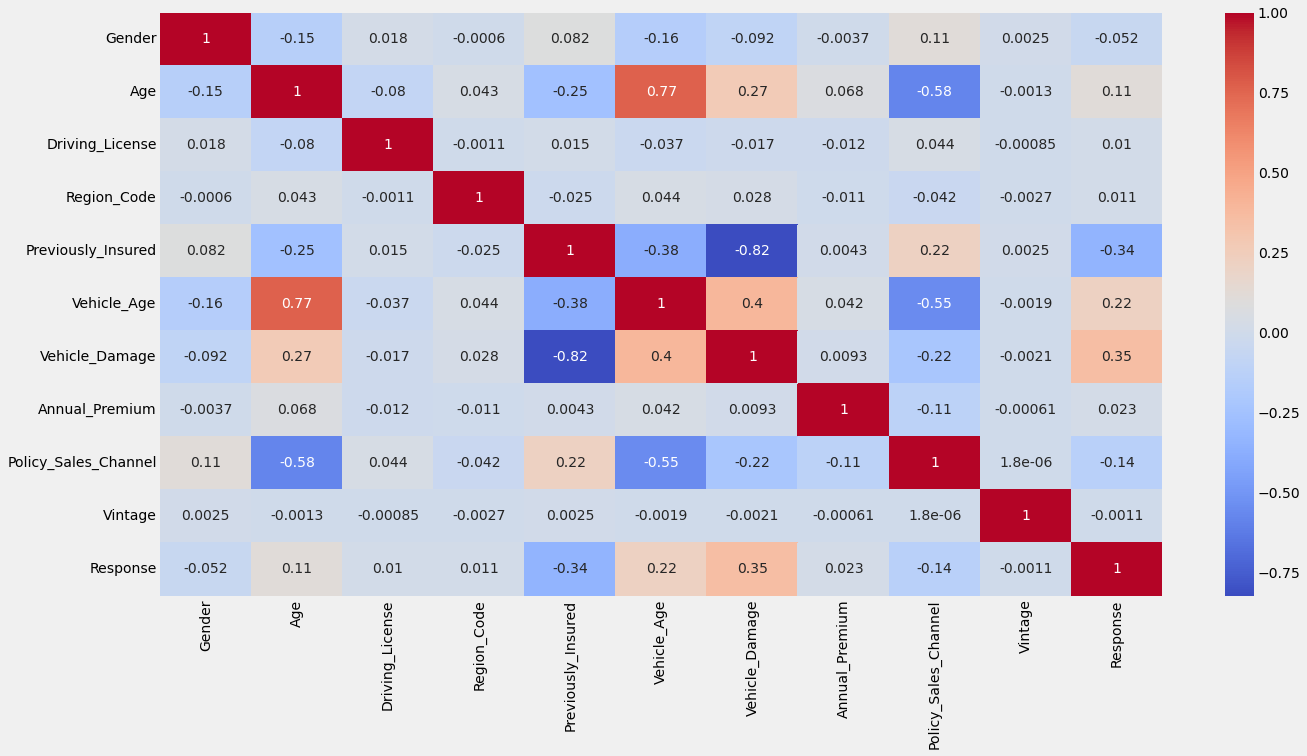

In [61]:

f, ax = plt.subplots(1, 1, figsize=(20, 10))
cmap = sns.diverging_palette(10, 240, n=9)
ax = sns.heatmap(df_model.corr(), annot=True, cmap='coolwarm')

La más relevante es la relación entre "Respuesta" y el resto de variables. En este caso veo alguna correlación entre Respuesta y "Vehicle_Damage", además hay una relación negativa con la variable binaria "Previously_Insured". Otras relaciones interesantes:
* la edad está fuertemente correlacionada con la edad del automóvil. Es bien sabido en la relación actuarial mundial que los jóvenes conducen automóviles viejos
* edad con canal de ventas, las personas mayores tienden a usar corredores y agentes, los jóvenes usan Internet
* previamente asegurado se correlaciona con la edad y la edad del vehículo. Los jóvenes tienden a cambiar de aseguradora a menudo
* previamente asegurado con daños en el vehículo, de hecho, muchos titulares de polos cambian de asegurador mientras corren un gran riesgo
* **Antigüedad del vehículo y canal de venta de pólizas: este es un efecto espurio interesante. El efecto subyacente real es la relación entre la edad y el canal de ventas, lo que influye indirectamente en las cifras de la antigüedad del vehículo**

## Factor de valor atípico local

<img src="http://upload.wikimedia.org/wikipedia/commons/4/4e/LOF-idea.svg" width="300" height="250">


*  El factor de valor atípico local se basa en un concepto de densidad local, donde la localidad viene dada por k vecinos más cercanos, cuya distancia se usa para estimar la densidad. Al comparar la densidad local de un objeto con las densidades locales de sus vecinos, se pueden identificar regiones de densidad similar y puntos que tienen una densidad sustancialmente menor que sus vecinos. Estos se consideran valores atípicos.

In [62]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [63]:
df_out=df_model.copy()
clf.fit_predict(df_out)
df_scores = clf.negative_outlier_factor_

In [64]:
df_scores[0:10]

array([-0.98040985, -1.21319855, -0.99002209, -1.04205167, -1.0189965 ,
       -0.99188542, -0.99149644, -0.99166232, -1.01552097, -1.02978322])

In [65]:
np.sort(df_scores)[0:50]

array([-711.21874398,   -3.6391412 ,   -3.58367092,   -3.5134539 ,
         -3.20800815,   -3.13681661,   -3.1359496 ,   -3.11241063,
         -3.10193159,   -3.08487422,   -3.01411724,   -2.98374937,
         -2.96797729,   -2.94799952,   -2.94186409,   -2.93583474,
         -2.84130409,   -2.82698711,   -2.82698681,   -2.82698668,
         -2.82698665,   -2.81542766,   -2.79904429,   -2.78573432,
         -2.74235144,   -2.7300804 ,   -2.70903294,   -2.70337963,
         -2.6953599 ,   -2.68358615,   -2.67265189,   -2.64500495,
         -2.64067271,   -2.64040744,   -2.58502733,   -2.58440118,
         -2.58439266,   -2.56271517,   -2.54312271,   -2.53300636,
         -2.52896187,   -2.51704661,   -2.51009487,   -2.50898323,
         -2.49895887,   -2.49804951,   -2.49710708,   -2.49123823,
         -2.48297054,   -2.47281338])

In [66]:
threshold_value = np.sort(df_scores)[1]
threshold_value

-3.6391412042125078

In [67]:
Outlier_df= df_out[df_scores < threshold_value]
indexs=Outlier_df.index
Outlier_df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
19205,0,22,1,45,1,0,0,6098.0,152,87,0


In [68]:
# Kick Outliers
for i in indexs:
    df_model.drop(i, axis = 0,inplace = True)

In [69]:
y=df_model['Response']
X=df_model.drop('Response',axis=1)

print('X shape :',X.shape)
print('y shape :',y.shape)

X shape : (381108, 10)
y shape : (381108,)


In [70]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,age_category
id,,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,31-48
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,71-80
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,31-48
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,20-30
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,20-30


In [71]:
# Normalize
X = (X - np.min(X)) / (np.max(X) - np.min(X)).values
X.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
id,,,,,,,,,,
1,0.0,0.369231,1.0,0.538462,0.0,1.0,1.0,0.070366,0.154321,0.716263
2,0.0,0.861538,1.0,0.057692,0.0,0.5,0.0,0.057496,0.154321,0.598616
3,0.0,0.415385,1.0,0.538462,0.0,1.0,1.0,0.066347,0.154321,0.058824
4,0.0,0.015385,1.0,0.211538,1.0,0.0,0.0,0.048348,0.932099,0.667820
5,1.0,0.138462,1.0,0.788462,1.0,0.0,0.0,0.046259,0.932099,0.100346


In [72]:
# Data split
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.2, #80% para entrenar y 20% para prueba
                                               random_state=42)

In [73]:
print('X_train :',X_train.shape)
print('X_test :',X_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)

X_train : (304886, 10)
X_test : (76222, 10)
y_train : (304886,)
y_test : (76222,)


## <a id='5'> 5. Regresión Logistica</a>

In [74]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [75]:
y_pred_loj = loj_model.predict(X_test)

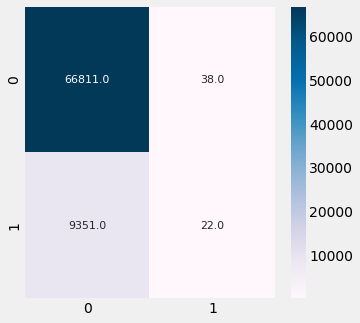

In [76]:


from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred_loj)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':11}, cmap = 'PuBu',fmt=".1f");


In [77]:
print("Training Accuracy :", loj_model.score(X_train, y_train))

print("Testing Accuracy :", loj_model.score(X_test, y_test))

Training Accuracy : 0.8773541586035436
Testing Accuracy : 0.8768203405840833


In [78]:
print(classification_report(y_test, y_pred_loj))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66849
           1       0.37      0.00      0.00      9373

    accuracy                           0.88     76222
   macro avg       0.62      0.50      0.47     76222
weighted avg       0.81      0.88      0.82     76222



In [79]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.8767285011768683

 ## <a id='6'> 6.Gaussian Naive Bayes</a>

In [80]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [81]:
y_pred_nb = nb_model.predict(X_test)

In [82]:
accuracy_score(y_test, y_pred_nb)

0.6408517225997743

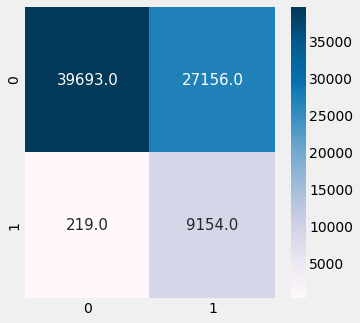

In [83]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu',fmt=".1f")

In [84]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66849
           1       0.25      0.98      0.40      9373

    accuracy                           0.64     76222
   macro avg       0.62      0.79      0.57     76222
weighted avg       0.90      0.64      0.70     76222



 ## <a id='7'> 7.KNN</a>

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [86]:
y_pred_knn = knn_model.predict(X_test)

In [87]:
accuracy_score(y_test, y_pred_knn)

0.8561307758914749

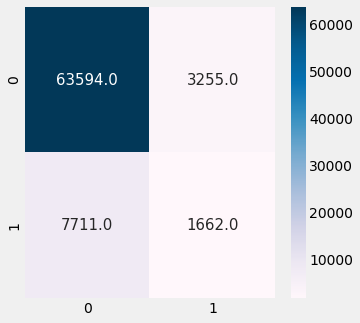

In [88]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu',fmt=".1f")

In [89]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     66849
           1       0.34      0.18      0.23      9373

    accuracy                           0.86     76222
   macro avg       0.61      0.56      0.58     76222
weighted avg       0.82      0.86      0.84     76222



 ## <a id='8'>8.Artificial Neural Networks </a>

In [90]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(random_state=42, max_iter=300).fit(X_train, y_train)

In [91]:
y_pred_mlpc =mlpc.predict (X_test)
accuracy_score(y_test,y_pred_mlpc)

0.8766629057227572

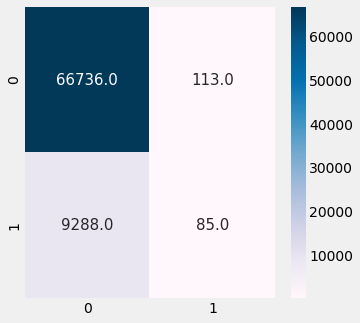

In [92]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred_mlpc)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu',fmt=".1f")

In [93]:
print(classification_report(y_test, y_pred_mlpc))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66849
           1       0.43      0.01      0.02      9373

    accuracy                           0.88     76222
   macro avg       0.65      0.50      0.48     76222
weighted avg       0.82      0.88      0.82     76222



 ## <a id='9'>9.Random Forest</a>

In [94]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(X_train,y_train)

In [95]:
y_pred_rf = rf_model.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.8661672483010154

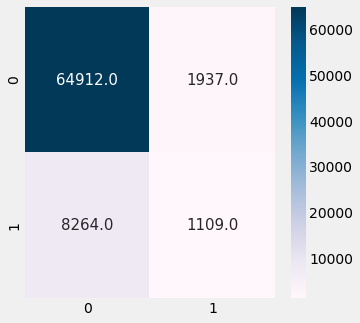

In [96]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu',fmt=".1f")

In [97]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     66849
           1       0.36      0.12      0.18      9373

    accuracy                           0.87     76222
   macro avg       0.63      0.54      0.55     76222
weighted avg       0.82      0.87      0.84     76222



In [98]:
Importance = pd.DataFrame ({"Importance": rf_model.feature_importances_*100},index=X_train.columns)

In [99]:
Importance.sort_values(by=['Importance'], ascending=False)

,Importance
Vintage,27.664059
Annual_Premium,24.796943
Age,14.140450
Region_Code,11.251126
Vehicle_Damage,7.456454
Policy_Sales_Channel,6.222134
Previously_Insured,5.137254
Vehicle_Age,1.955401
Gender,1.327354
Driving_License,0.048824


Text(0.5, 0, 'Niveles de Significancia')

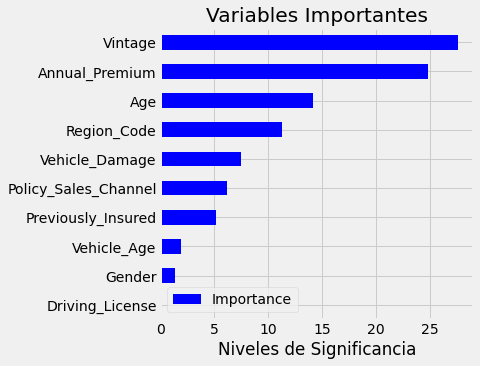

In [100]:
Importance.sort_values(by = "Importance", axis = 0, ascending=True).plot(kind = "barh", color = "b")
plt.title ("Variables Importantes")
plt.xlabel ("Niveles de Significancia")

 ## <a id='10'>10.Gradient Boosting Machines </a>

In [101]:
from sklearn.ensemble import GradientBoostingClassifier

In [102]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [103]:
y_pred_gbm = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred_gbm)

0.8769908950171866

In [104]:
print(classification_report(y_test, y_pred_gbm))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66849
           1       0.00      0.00      0.00      9373

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222



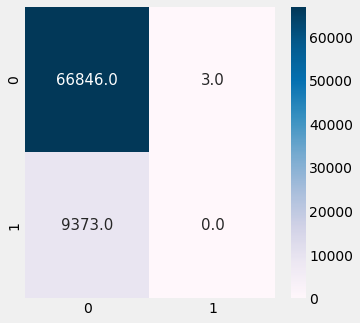

In [105]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred_gbm)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu',fmt=".1f")

 ## <a id='11'>11.XGBoost </a>


In [106]:
print('X_train :',X_train.shape)
print('X_test :',X_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)

X_train : (304886, 10)
X_test : (76222, 10)
y_train : (304886,)
y_test : (76222,)


In [107]:
from xgboost import XGBClassifier
import xgboost as xgb
xgb_model = XGBClassifier().fit (X_train, y_train)

In [108]:
y_pred_xgb_model = xgb_model.predict(X_test)
accuracy_score (y_test, y_pred_xgb_model)

0.8770302537325182

In [109]:
print(classification_report(y_test, y_pred_xgb_model))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66849
           1       0.00      0.00      0.00      9373

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222



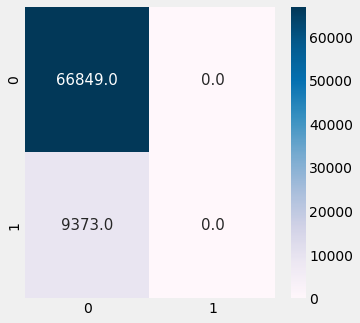

In [110]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb_model)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu',fmt=".1f")

Text(0.5, 1.0, 'Variable Importance')

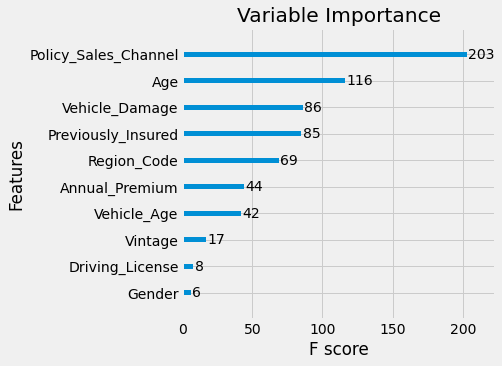

In [111]:
xgb.plot_importance (xgb_model)
plt.title("Variable Importance")

In [112]:
from sklearn.metrics import roc_curve, auc

xgb_model = XGBClassifier().fit (X_train, y_train)
y_score = xgb_model.predict_proba (X_test)[:,1]

fpr, tpr, thresholds = roc_curve (y_test, y_score)

fig = px.area (
    x = fpr, y=tpr, 
    title=f'ROC Curve (AUC={auc(fpr,tpr):.4f})', 
    labels = dict (x = 'Flase Positive Rate', y = 'True Positive Rate'), 
    width = 700, height = 500
)
fig.add_shape (
    type = 'line', line = dict (dash='dash'),
    x0=0 , x1=1, y0=0 , y1=1
)

fig.update_yaxes (scaleanchor = "x", scaleratio = 1)
fig.update_xaxes (constrain = 'domain')
fig.show()

In [ ]:
#Model Tuning
xgb_model = XGBClassifier(random_state=42, max_depth=8, n_estimators=3000,
                          reg_lambda=1.2,reg_alpha=1.2,
                          min_child_weight=1, objective='binary:logistic',
                          learning_rate=0.15, gamma= 0.3, colsample_bytree= 0.5,
                          eval_metric = 'auc').fit(X_train,y_train)

In [ ]:
y_pred_xgb_model = xgb_model.predict(X_test)
accuracy_score (y_test, y_pred_xgb_model)

In [ ]:
print(classification_report(y_test,y_pred_xgb_model))

In [ ]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb_model)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu',fmt=".1f")

## <a id='12'> 12.LightGBM </a>

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
from pandas._libs.lib import is_datetime_with_singletz_array
from re import VERBOSE
from pandas.core.common import random_state
LGB_model = LGBMClassifier(random_state=42, max_depth=8, n_estimators=3000,
                          reg_lambda=1.2,reg_alpha=1.2,
                          min_child_weight=1,verbose =1,
                           learning_rate=0.15, gamma = 0.3,  colsample_bytree= 0.5,
                          eval_metric = 'auc', is_higher_better = 1, plot = True)
LGB_model.fit(X_train,y_train)

In [ ]:
y_pred_LGB_model = LGB_model.predict(X_test)
accuracy_score (y_test, y_pred_LGB_model)

In [ ]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred_LGB_model)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu',fmt=".1f")

In [ ]:
print(classification_report(y_test,y_pred_LGB_model))

## <a id='13'> 13.Comparando todos los modelos </a>

In [ ]:
models = [
    knn_model,
    loj_model,
    nb_model,
    mlpc,
    gbm_model,
    LGB_model, 
    xgb_model,
    rf_model,    
]

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(accuracy))

In [ ]:


result = []

results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)    
    result = pd.DataFrame([[names, accuracy*100]], columns= ["Models","Accuracy"])
    results = results.append(result)
    
    
sns.barplot(x= 'Accuracy', y = 'Models', data=results, color="b")
plt.xlabel('Accuracy %')
plt.title('Accuracy Ratios of Models')
plt.show()

In [ ]:
results.sort_values(by=['Accuracy'], inplace=True, ascending=False)
print (results)


In [ ]:
gender_map= {'Male':0,'Female':1}
vehicle_age_map= {'< 1 Year':0,'1-2 Year':1,'> 2 Years':2}
vehicle_damage_map= {'Yes':1,'No':0}

dftrain = df.copy()

dftrain['Gender']= dftrain['Gender'].map(gender_map)
dftrain['Vehicle_Age']= dftrain['Vehicle_Age'].map(vehicle_age_map)
dftrain['Vehicle_Damage']= dftrain['Vehicle_Damage'].map(vehicle_damage_map)
dftrain.head(5)


In [ ]:
dftrain.loc[dftrain.loc[:, 'Response'] == 1]

In [ ]:
#Normalización de los datos
dftrain = (dftrain - np.min(dftrain)) / (np.max(dftrain) - np.min(dftrain)).values
dftrain.loc[dftrain.loc[:, 'Response'] == 1]

In [ ]:
#Se copian solo los que respondieron "1"
dfone= dftrain.loc[dftrain.loc[:, 'Response'] == 1].copy()

#Se elimina las 2 columnas para cumplir con los 10 elementos del modelo y poderlos predecir
dfone=dfone.drop(['id', 'Response'], axis=1)
dfone.head()

In [ ]:
#se predice todo el dataframe, donde no todos los que respondieron si hacen HIT
mlpc.predict(dfone)

In [ ]:
#se muestran los datos que si hicieron hit con la predicción.
np_array = mlpc.predict(dfone)
np.where(np_array == 1)

In [ ]:
#se predice todo el dataframe, donde no todos los que respondieron si hacen HIT
loj_model.predict(dfone)

In [ ]:
#se muestran los datos que si hicieron hit con la predicción.
np_array = loj_model.predict(dfone)
np.where(np_array == 1)

In [ ]:
#se predice todo el dataframe, donde no todos los que respondieron si hacen HIT
gbm_model.predict(dfone)

In [ ]:
#se muestran los datos que si hicieron hit con la predicción.
np_array = gbm_model.predict(dfone)
np.where(np_array == 1)

In [ ]:
#primer elmento del arreglo con valor nomralizado de  mlpc.predict(dfone)
dfone[663: 664] 

In [ ]:
#primer elmento del arreglo con valor nomralizado de loj_model.predict(dfone)
dfone[668: 669] 

In [ ]:
#primer elmento del arreglo con valor nomralizado de gbm_model.predict(dfone)
dfone[1377: 1378] 


In [ ]:
#se muestran todos los elementos que si hicieron hit con su valores normalizados solo para  gbm_model.predict(dfone) total 15 registros
cambio = list(np.where(np_array == 1))
resul = dfone.iloc[cambio[0]]

In [ ]:
resul.describe()

In [ ]:
resul

In [ ]:
resul.dtypes 

In [ ]:
resul.info() 

In [ ]:
counterFunc = resul.apply(lambda x: True if x['Age'] == 0.200000 else False , axis=1)
numOfRows = len(counterFunc[counterFunc == True].index)
print('Row count:',numOfRows)

In [ ]:
                       #[Gender, Age,  Driving_License,  Region_Code,  Previously_Insured, Vehicle_Age, Vehicle_Damage,  Annual_Premium,  Policy_Sales_Channel, Vintage   
                         
print(mlpc.predict([     [0.0,	0.200000,	1.0,    0.538462,	0.0,	0.0,	1.0,	0.137865,	0.154321,	0.446367	],
                         [1.0,	0.200000,	1.0,	0.538462,	0.0,	0.0,	1.0,	0.073547,	0.759259,	0.439446	],
                         [1.0,	0.200000,	1.0,	0.538462,	0.0,	0.0,	1.0,	0.049414,	0.759259,	0.633218    ],
                         [0.0,	0.200000,	1.0,	0.384615,	0.0,	0.0,	1.0,	0.064703,	0.759259,	0.996540	],
                         [0.0,	0.200000,	1.0,	0.384615,	0.0,	0.0,	1.0,	0.064703,	0.759259,	0.996540	],
                         [0.0,	0.369231,	1.0,	0.538462,	0.0,	0.0,    1.0,	0.077117,	0.759259,	0.103806    ],
                         [1.0,	0.461538,	1.0,	0.538462,	0.0,	0.0,    1.0,	0.137865,	0.154321,	0.446367    ],
                         [0.0,	0.307692,	1.0,	0.538462,	0.0,	0.5,	1.0,	0.047407,	0.759259,	0.927336    ],
                   
                   ]))
#1 : El cliente esta interesado
#0 : El cliente no esta interesado

In [ ]:
# se valida un valor que hizo HIT en la predicción son normalizar
df.iloc[5415: 5416]

In [ ]:
#se crea data frame normalizado
gender_map= {'Male':0,'Female':1}
vehicle_age_map= {'< 1 Year':0,'1-2 Year':1,'> 2 Years':2}
vehicle_damage_map= {'Yes':1,'No':0}

dfnor = df.copy()

dfnor['Gender']= dfnor['Gender'].map(gender_map)
dfnor['Vehicle_Age']= dfnor['Vehicle_Age'].map(vehicle_age_map)
dfnor['Vehicle_Damage']= dfnor['Vehicle_Damage'].map(vehicle_damage_map)


dfnor = (dfnor - np.min(dfnor)) / (np.max(dfnor) - np.min(dfnor)).values

In [ ]:
#Dato Normalizado
dfnor.iloc[5415: 5416]

In [ ]:


#[Gender, Age,  Driving_License,  Region_Code,  Previously_Insured, Vehicle_Age, Vehicle_Damage,  Annual_Premium,  Policy_Sales_Channel, Vintage   
                         
print(loj_model.predict([[1.0,	0.200000,	1.0,	0.576923,	0.0,	1.0,	1.0,	0.049842,	0.154321,	0.366782    ],
                         [1.0,	0.200000,	1.0,	0.538462,	0.0,	0.0,	1.0,	0.073547,	0.759259,	0.439446	],
                         [1.0,	0.200000,	1.0,	0.538462,	0.0,	0.0,	1.0,	0.049414,	0.759259,	0.633218    ],
                         [0.0,	0.200000,	1.0,	0.384615,	0.0,	0.0,	1.0,	0.064703,	0.759259,	0.996540	],
                         [0.0,	0.200000,	1.0,	0.384615,	0.0,	0.0,	1.0,	0.064703,	0.759259,	0.996540	],
                         [0.0,	0.369231,	1.0,	0.538462,	0.0,	0.0,    1.0,	0.077117,	0.759259,	0.103806    ],
                         [1.0,	0.461538,	1.0,	0.538462,	0.0,	0.0,    1.0,	0.137865,	0.154321,	0.446367    ],
                         [0.0,	0.307692,	1.0,	0.538462,	0.0,	0.5,	1.0,	0.047407,	0.759259,	0.927336    ],
                   
                   ]))
#1 : El cliente esta interesado
#0 : El cliente no esta interesado

In [ ]:

#[Gender, Age,  Driving_License,  Region_Code,  Previously_Insured, Vehicle_Age, Vehicle_Damage,  Annual_Premium,  Policy_Sales_Channel, Vintage   
                         
print(gbm_model.predict([[1.0,	0.400000,	1.0,	0.0,     	0.0,	1.0,	1.0,	0.120117,	0.154321,	0.934256	],
                         [1.0,	0.184615,	1.0,	0.538462,	0.0,    0.0,	1.0,	0.000000,	1.000000,	0.996540	],
                         [1.0,	0.200000,	1.0,	0.538462,	0.0,	0.0,	1.0,	0.049414,	0.759259,	0.633218    ],
                         [0.0,	0.200000,	1.0,	0.384615,	0.0,	0.0,	1.0,	0.064703,	0.759259,	0.996540	],
                         [0.0,	0.200000,	1.0,	0.384615,	0.0,	0.0,	1.0,	0.064703,	0.759259,	0.996540	],
                         [0.0,	0.369231,	1.0,	0.538462,	0.0,	0.0,    1.0,	0.077117,	0.759259,	0.103806    ],
                         [1.0,	0.461538,	1.0,	0.538462,	0.0,	0.0,    1.0,	0.137865,	0.154321,	0.446367    ],
                         [0.0,	0.307692,	1.0,	0.538462,	0.0,	0.5,	1.0,	0.047407,	0.759259,	0.927336    ],
                   
                   ]))
#1 : El cliente esta interesado
#0 : El cliente no esta interesado